# Task 1: Importing Libraries

In [4]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [6]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

#colors will be used for visualization purposes.

# Task 2: Dataset Preprocessing

In [7]:
#artificially created dset.

X,y=make_blobs(n_features=50,centers=20,n_samples=20000,cluster_std=0.2,center_box=[-1,1],random_state=17)

#50 dimensions with 20 clusters. and we need 20k samples. and if u have less samples it may be not enough info to train on.
#cluster_std : std of cluster centers. center boxs set our 20 centers to be in a reasonable boundary.

In [8]:
X.shape

(20000, 50)

In [9]:
X[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=17)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#u dont need to min max scale y, its cluster labels.

In [16]:
y_train.shape 

(18000,)

In [14]:
np.unique(y_train)
#these are cluster labels created by make_blobs y has 20k samples y_train has 18k, y_test has 2k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

# Task 3: Baseline Model (PCA)

In [17]:
pca=PCA(n_components=2)
pca.fit(X_train)

res_pca=pca.transform(X_test)

Text(0.5, 1.0, 'PCA Results')

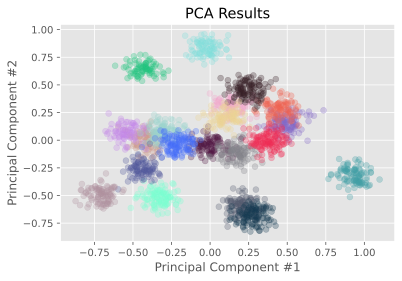

In [18]:
unique_labels= np.unique(y_test)

for index,unique_label in enumerate(unique_labels):
    X_data=res_pca[y_test==unique_label]
    
    plt.scatter(X_data[:,0],X_data[:,1],alpha=0.3,c=cols[index])
    
plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.title("PCA Results")

# Task 4: Autoencoder Training

In [20]:
#MLP stds for MultiLayerPerceptron and Perceptron is weighted sum and non-linear function. (its similar to logreg)
#and its MLPRegressor bcs its not a classification task for now. bcs we gave our input and try to predict our input again.
#so its like numerical value prediction (not a class also) thus its a regression task.

autoencoder=MLPRegressor(alpha=1e-15,hidden_layer_sizes=(50,100,50,2,50,100,50),random_state=1,max_iter=20000)

#alpha is learning rate. how much model moves in the direction of minimizing that err func. and for hidden_layer_sizes we 
#now that our input has 50 dims so it could be good to give 50 dims to 1st hidden layer. u could try this steps ofc. and
#max_iter is little higher bcs we want to be sure that our model learns correctly.

autoencoder.fit(X_train,X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

# Task 5: Dimension Reduction w Encoder

In [21]:
W=autoencoder.coefs_
biases=autoencoder.intercepts_

#basically neural network weights(coefs) and intercepts/biases

In [22]:
for w in W:
    print(w.shape)
    
# u can see the dimensions of the coefs here. we re only care about encoding part. so just first 4 tuples are imp for us.
# we ll deal w decoding part later.

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [23]:
encoder_weights=W[0:4]
encoder_biases=biases[0:4]

In [32]:
print(encoder_biases[0].shape)
encoder_biases[0]

(50,)


array([ 0.28957492,  0.07667978,  0.09339062, -0.01844879,  0.11658966,
       -0.00182343, -0.1869197 , -0.09145603, -0.03266827, -0.1823294 ,
       -0.00909199, -0.17179686,  0.23353919, -0.09168652, -0.13384535,
       -0.04498174,  0.07374477, -0.21121665, -0.1209907 ,  0.13974863,
        0.13087834,  0.03910184,  0.23695355, -0.1685919 ,  0.15447911,
        0.22553745, -0.17110192, -0.1255295 ,  0.07869512, -0.02408811,
        0.06929567, -0.16359502, -0.13492863,  0.19637834,  0.25156941,
        0.26736239,  0.22782983, -0.19875983, -0.1734587 , -0.20761034,
        0.04100041,  0.23595005,  0.01557479,  0.10679967, -0.10063603,
        0.25351744, -0.18842362, -0.20800121, -0.0225565 ,  0.04684794])

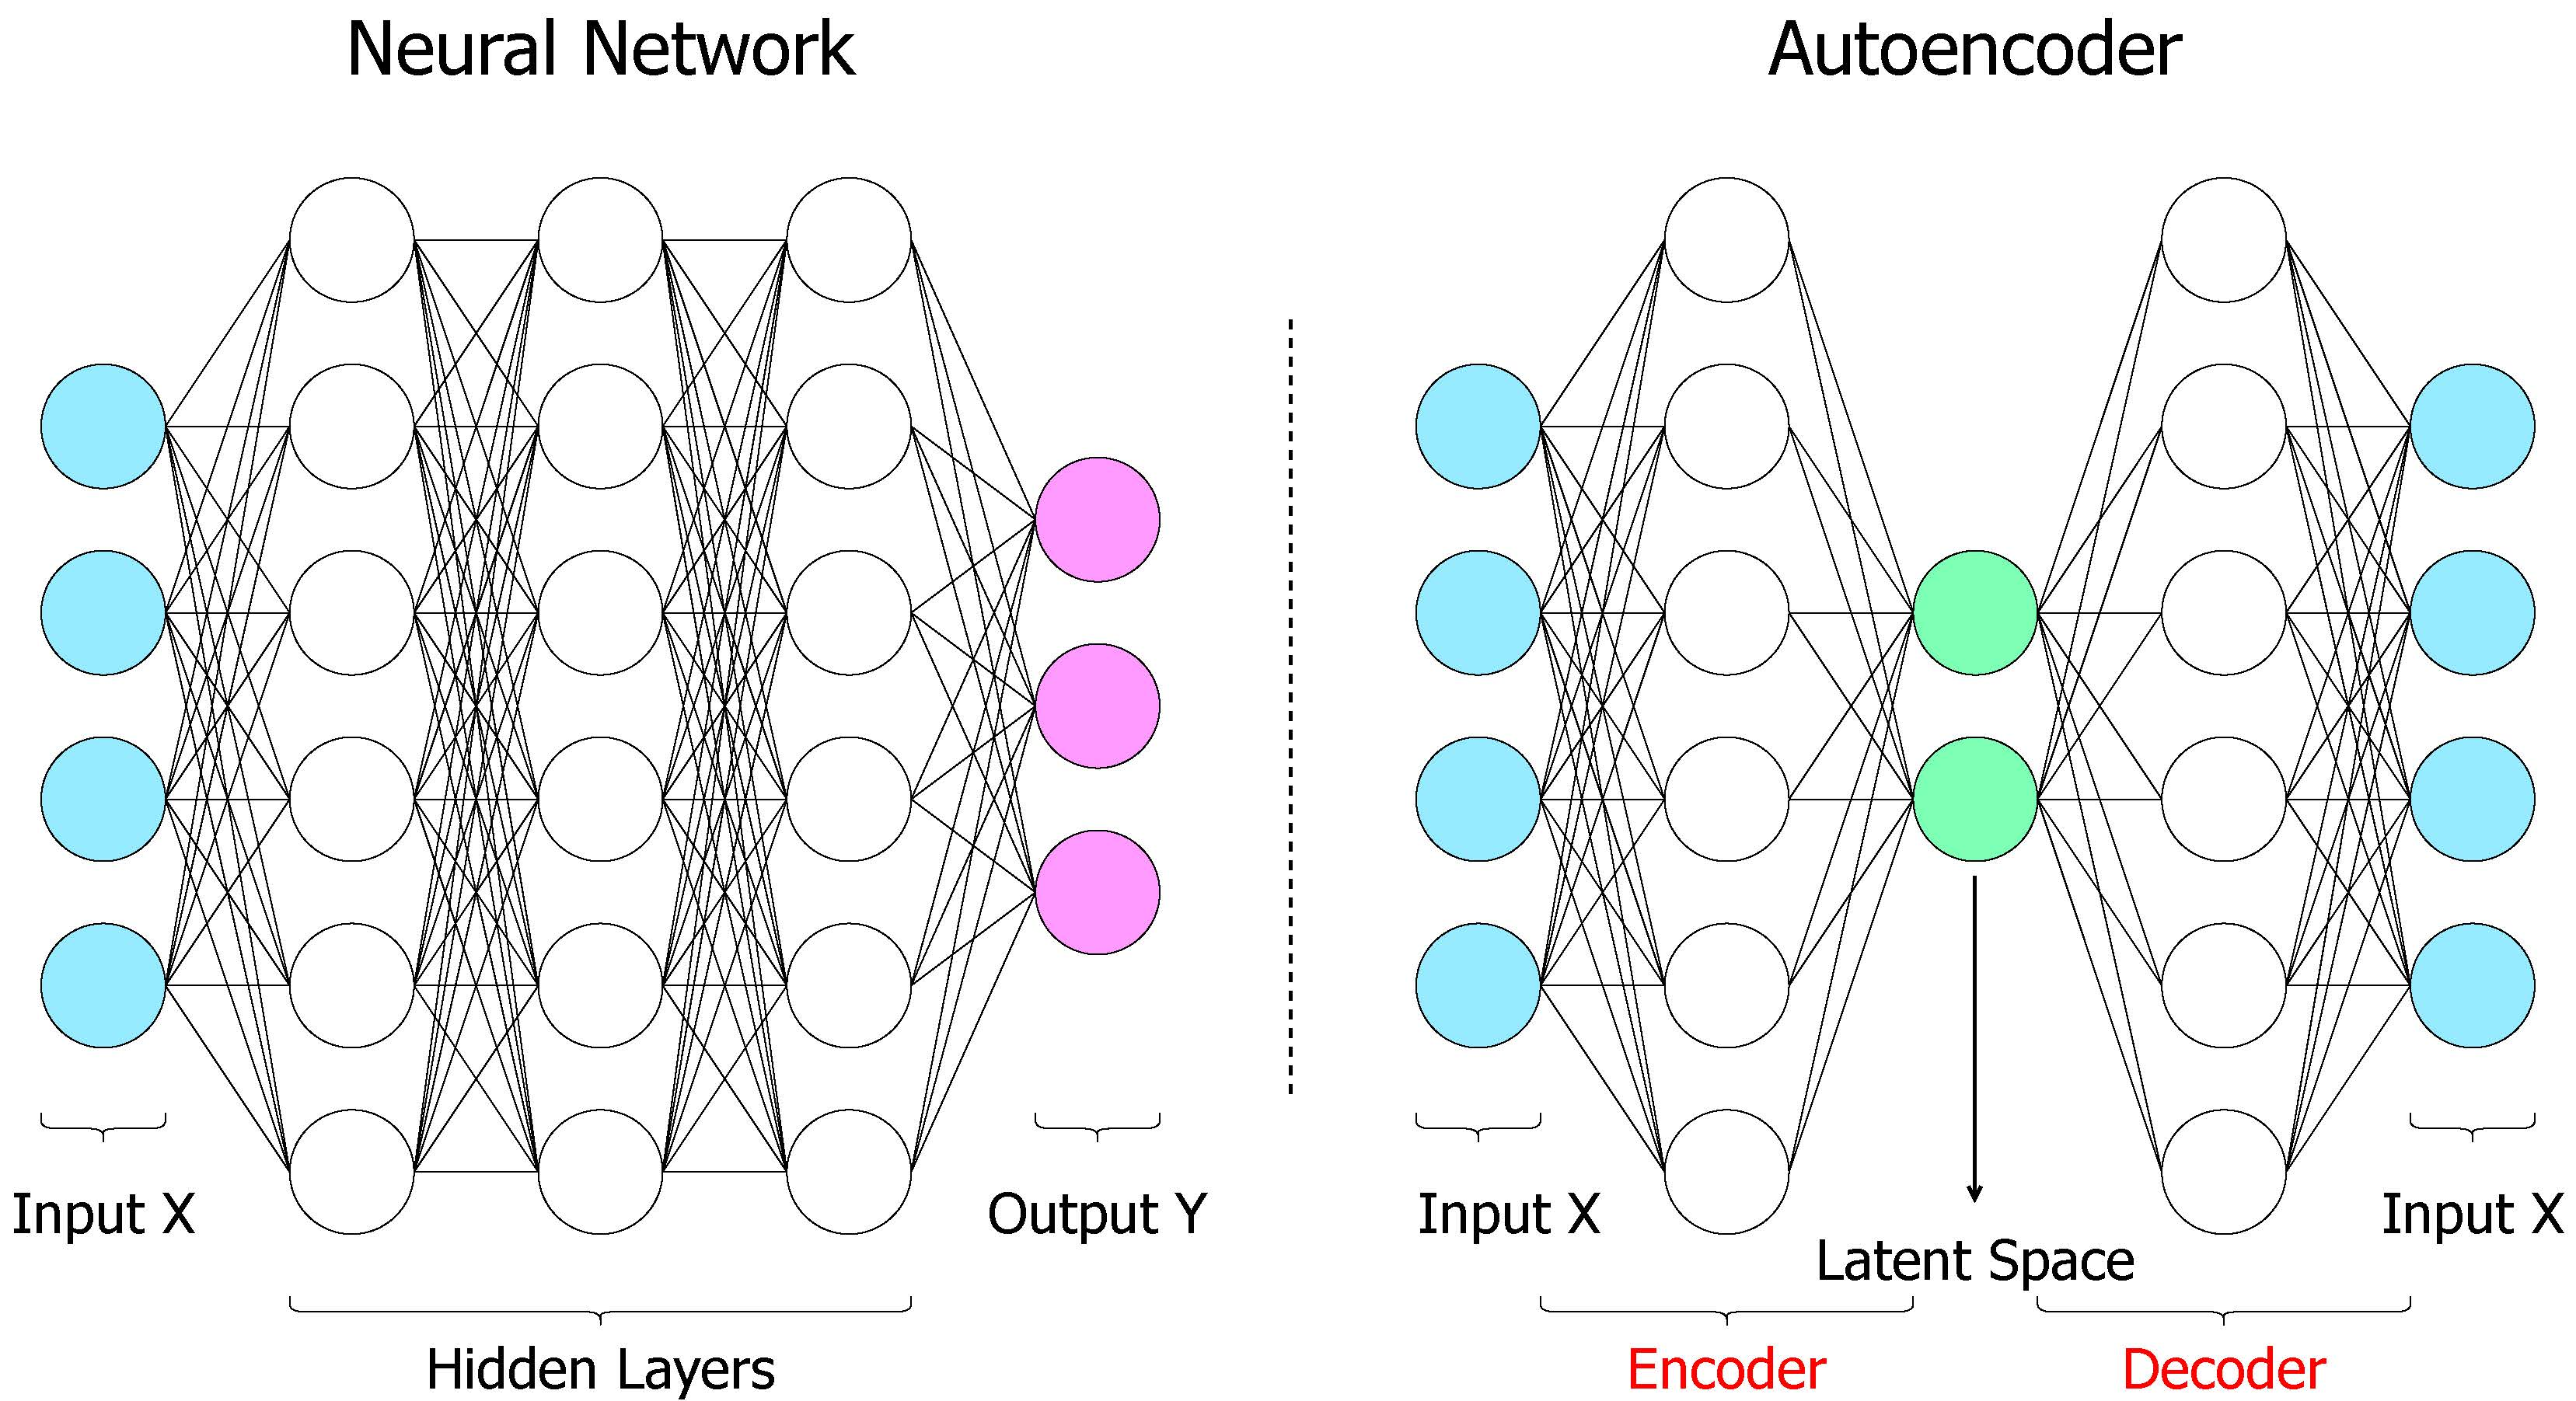

In [1]:
from IPython.display import Image
Image(filename='what_is_autoencoder_visually.jpg') 

In [39]:
def encode(encoder_weights,encoder_biases,data):
    res_ae=data
    for index, (w,b) in enumerate(zip(encoder_weights,encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae=res_ae@w+b
        else:
            res_ae=np.maximum(0,res_ae@w+b)
    return res_ae

#(w,b) is iteration of 1st layer weights and biases then 2nd layer w and b etc. and for every layer we ll get linear comb of
#values to get each node val in hidden layers. so for ex for first iteration w=(50,50) (shape) and b=(50,) and res_ae is 
#(2000,50) and so after first iteration we have (2000,50) hidden layer data. but its just a linear combination. we need
#activation vals to achieve "real hidden layer data" and our act func (for all layers) is ReLU. so we use np.maximum(). its
#basically reLU of np.


#so where is that if statement comes from though?? if u check the img above, we need vals right before that non-linearity,
#right before that relu part. so on last iteration, on 4th layer when its reduced from 50d to 2d when res_ae becomes 2000,2
#we wont apply relu on that last step.

#now we down from 50d to 2d.
res_ae=encode(encoder_weights,encoder_biases,X_test)

In [40]:
res_ae.shape

(2000, 2)

In [34]:
X_test.shape

(2000, 50)

In [36]:
len(encoder_weights)

4

Text(0.5, 1.0, 'Autoencoder Results')

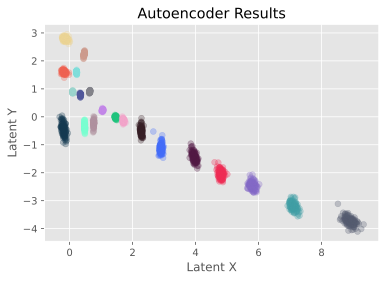

In [41]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [42]:
silhouette_score(X_test, y_test)
#without any pca. remember that silhouette score is btw -1 to 1. 1 is best -1 is worse

0.6100948647899368

In [43]:
silhouette_score(res_pca, y_test)
#our pca vs y_test

0.3678535911331914

In [44]:
silhouette_score(res_ae, y_test)
#and lastly our autoencoder and y_test

0.8074659602017243

In [ ]:
#remember that we' ve done this via sklearn. there are much more complex autoencoder type systems that gives u better res.
#such as:
#pytorch,tensorflow.

#also u could use decode part as well to see how well we reconstruct our input data. how well our 50d->2d->50d will occur.

#u could check mse to see how well yr auto_encoder is actually. (bcs u know yr cluster labels thx to y_test) and u can 
#compare it with other autoencoders, or pca, or default data. Its just an alternative to the silhouette_score. nothing else.